In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
from pytz import all_timezones
import glob


F:\ana\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


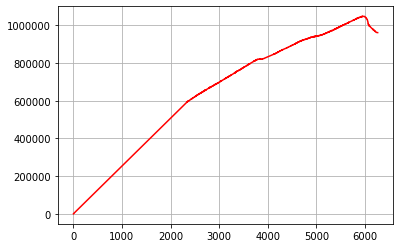

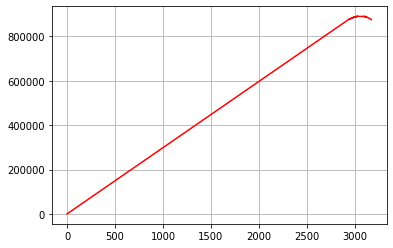

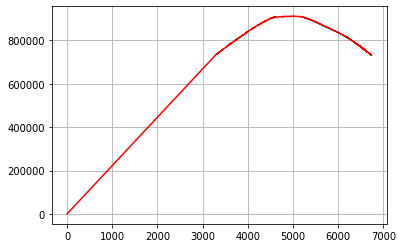

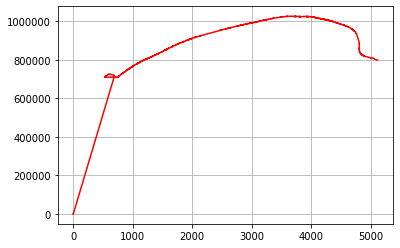

In [3]:
files = glob.glob('Files/*.csv')
for file in files:
    df = pd.read_csv(file, encoding='unicode_escape')
    df1 = df[['Disp_nm','Force_µN']]
    df1['Ones'] = 1
    f  = df1['Force_µN'].idxmax(axis = 0)
    df_final = df1[(df1['Force_µN']>=12000) & (df1.index<=f)]
    g = (f*10//100)
    s = df1.index[-1]
    t = df_final.index[0]
    r = (s-t)//g
    m=0
    c=0
    q=c
    p=m
    for i in range(1,g+1):
        df_new = df_final[(df_final.index>=t) & (df_final.index<=(r+t))]
        k = df_new[['Disp_nm','Ones']]
        l = df_new['Force_µN']
        m,c = np.linalg.lstsq(k,l,rcond=None)[0]
        if m > p:
            p = m
            q=c
            result_final = df_new
            x = result_final[['Disp_nm','Ones']]
            y = result_final['Force_µN']
        
        t = t + r

    ya = p*x + q
    e=y.index[-1]
    df_new = df1[(df1.index<=e)]
    x_new = df_new[['Disp_nm','Ones']]
    y_new = (p*x_new) + q
    y_new.columns = ['Force_µN','Ones']
    l = y_new['Force_µN'].iloc[-1]
    df_3 = df1[(df1['Force_µN']>=l)]     
    ya = df_3[['Force_µN','Ones']]
    xa = df_3[['Disp_nm','Ones']]
              
    y_fin = y_new.append(ya,sort = False)
    y_final=y_fin.drop(y_fin.index[-1])
    y_final1= y_final[(y_final>=0)]
    x_fin = x_new.append(xa,sort = False)
    x_final=x_fin.drop(x_fin.index[-1])
    x_intercept = -q/p
    x_fin1 = x_final - x_intercept
    x_fin2 = x_fin1[(x_fin1>=0)]
    plt.plot(x_fin2, y_final1, '-r', label='Final')
    plt.grid()
    plt.show()



